In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

a1, c1 = 2, 3
a2, c2 = 3, 1
a3, c3 = 1, 2

b1, d1 = 1, 1
b2, d2 = -1, -0.5
b3, d3 = 2, -0.75

def f1(x):
    return a1 * (x[0] - b1)**2 + c1 * (x[1] - d1)**2

def f2(x):
    return a2 * (x[0] - b2)**2 + c2 * (x[1] - d2)**2

def f3(x):
    return a3 * (x[0] - b3)**2 + c3 * (x[1] - d3)**2

In [2]:
def additive_convolution(weights, x0=(0, 0)):
    """Минимизация аддитивной свертки критериев."""
    def F(x):
        return weights[0] * f1(x) + weights[1] * f2(x) + weights[2] * f3(x)
    
    res = minimize(F, x0, method='BFGS')
    return res.x

pareto_additive = []
for alpha in np.linspace(0, 1, 10):
    weights = [alpha, (1 - alpha) / 2, (1 - alpha) / 2]
    point = additive_convolution(weights)
    pareto_additive.append(point)

pareto_additive = np.array(pareto_additive)

In [3]:
def discrimination_method(constraints, x0=(0, 0)):
    """Минимизация с ограничениями на критерии."""
    def F(x):
        return f1(x) + f2(x) + f3(x)
    
    cons = (
        {'type': 'ineq', 'fun': lambda x: constraints[0] - f1(x)},  # f1(x) ≤ constraint
        {'type': 'ineq', 'fun': lambda x: constraints[1] - f2(x)},  # f2(x) ≤ constraint
        {'type': 'ineq', 'fun': lambda x: constraints[2] - f3(x)},  # f3(x) ≤ constraint
    )
    
    res = minimize(F, x0, method='SLSQP', constraints=cons)
    return res.x

pareto_discrimination = []
for c in np.linspace(1, 5, 10):
    constraints = [c, c, c]
    point = discrimination_method(constraints)
    pareto_discrimination.append(point)

print(pareto_discrimination)

pareto_discrimination = np.array(pareto_discrimination)

[array([7.34715623e-15, 9.81871423e-15]), array([2.63084120e-14, 1.29789037e-14]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([0., 0.]), array([ 0.06990132, -0.00274123]), array([ 0.1448985 , -0.00827991]), array([0.19058939, 0.05049635]), array([0.17237056, 0.16098042])]


In [4]:
def successive_concessions(delta_f1=10, delta_f2=100, x0=(0, 0)):
    """Оптимизация с уступками по приоритетам."""
    res1 = minimize(f1, x0, method='BFGS')
    x_opt = res1.x
    f1_opt = f1(x_opt)

    cons_f2 = {'type': 'ineq', 'fun': lambda x: delta_f1 - (f1(x) - f1_opt)}
    res2 = minimize(f2, x0, method='SLSQP', constraints=cons_f2)
    x_opt = res2.x
    f2_opt = f2(x_opt)

    cons_f3 = (
        {'type': 'ineq', 'fun': lambda x: delta_f1 - (f1(x) - f1_opt)},
        {'type': 'ineq', 'fun': lambda x: delta_f2 - (f2(x) - f2_opt)},
    )
    res3 = minimize(f3, x0, method='SLSQP', constraints=cons_f3)
    return res3.x

pareto_successive = []
for delta in np.linspace(1, 5, 10):
    point = successive_concessions(delta_f1=delta, delta_f2=delta*2)
    pareto_successive.append(point)

pareto_successive = np.array(pareto_successive)

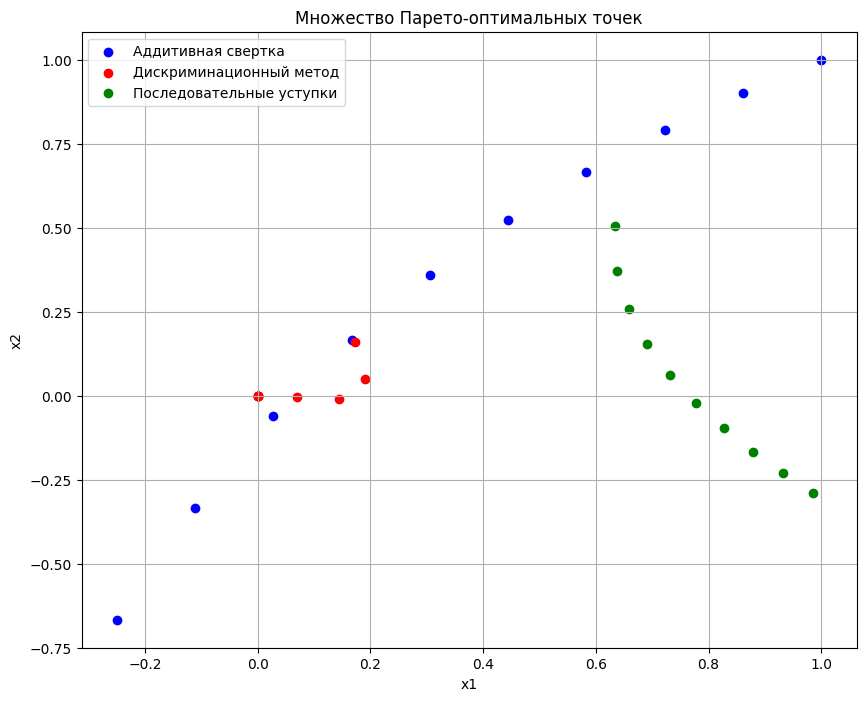

In [5]:
plt.figure(figsize=(10, 8))

plt.scatter(pareto_additive[:, 0], pareto_additive[:, 1], color='blue', label='Аддитивная свертка')

plt.scatter(pareto_discrimination[:, 0], pareto_discrimination[:, 1], color='red', label='Дискриминационный метод')

plt.scatter(pareto_successive[:, 0], pareto_successive[:, 1], color='green', label='Последовательные уступки')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Множество Парето-оптимальных точек')
plt.legend()
plt.grid(True)
plt.show()